In [1]:
import torch
import sys
sys.path.append("/home/xiaoyuz1/amazon_turk/Pytorch-Sketch-RNN")
import sketch_rnn as sr

import numpy as np
import matplotlib.pyplot as plt
import PIL

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

import torchvision.models as models
import os

import part_model as pm
from importlib import reload
import pickle
reload(pm)
reload(sr)

import ujson as json

import read_datasets as rd
import cv2
import pandas as pd


reload(rd)

(9548,) <class 'numpy.ndarray'>
(9548,) <class 'numpy.ndarray'>


<module 'read_datasets' from '/home/xiaoyuz1/amazon_turk/read_datasets.py'>

In [5]:
dataset_mapping = {'butterfly': [[], []],
                   'ice_cream': [[1], [0]],
 'candle': [[0], [1,2]],
 'drill': [[1], [0]],
 'pineapple': [[1], [0]],
 'ambulance': [[1], [0]],
 'duck': [[1], [0,3]],
 'basket': [[1], [0]],
 'pig': [[5], [0,1,2,3,4]],
 'suitcase': [[1], [0]],
 'angel': [[5], [0,1,2,3,4]],
 'alarm_clock': [[], []],
 'flower': [[2], [0,1]],
 'house': [[1], [0]],
 'coffee_cup': [[], []],
 'bulldozer': [[], []],
 'calculator': [[], []],
 'face': [[], []],
 'campfire': [[], []],
 'airplane': [[], []],
 'backpack': [[], []],
 'ant': [[3], [0,1,2]],
 'crab': [[2], [0,1]],
 'apple': [[], []],
 'cactus': [[], []]}

In [2]:
dataset_info = \
    np.load('/raid/xiaoyuz1/sketch_datasets/spg_body/body_idx.npz', encoding='latin1', allow_pickle=True)
train_info = dataset_info['train']

hp = sr.HParams()
dataset = np.load(hp.data_location, encoding='latin1', allow_pickle=True)
orig_data = dataset['train']
orig_data, orig_kept = sr.purify(orig_data)
# orig_data = sr.normalize(orig_data)
scale_factor = sr.calculate_normalizing_scale_factor(orig_data)
print(scale_factor, sr.scale_factor)

data = sr.data

11.889778 11.889778


In [3]:
model = sr.Model()

/home/xiaoyuz1/anaconda3/envs/clipdraw/lib/python3.8/site-packages/torch/nn/modules/rnn.py:58: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.9 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [8]:
epoch = 20000
root_folder = "/raid/xiaoyuz1/sketch_datasets/spg_body"
folder = '/raid/xiaoyuz1/sketch_datasets/spg_body/model'
encoder_path = 'encoderRNN_sel_0.686648_epoch_20000.pth'
decoder_path = 'decoderRNN_sel_0.686648_epoch_20000.pth'
model.load(os.path.join(folder, encoder_path), os.path.join(folder, decoder_path))

In [33]:
print(len(sr.data), len(sr.kept_idx))

9349 9548


In [20]:
L = np.where(train_info[:,0] == 'angel')[0]
def infer_one(idx_test):
    train_category, train_idx = train_info[idx_test]
    print(train_category, train_idx)

    part_start_end = dataset_mapping[train_category]
    rendered_idxs, _ = part_start_end
    
    new_idx = np.cumsum(sr.kept_idx,0) -1
    #print(new_idx[idx_test-1], new_idx[idx_test])
    idx_test_in_data = new_idx[idx_test]
    #print(idx_test_in_data)
    
    batch, lengths = sr.make_batch(1, random=False, selected_idx=[idx_test_in_data])
    name = '_angel_output_{}_{}'.format(idx_test, idx_test_in_data)
    model.condition_generation_one(epoch, batch, lengths, name)
    return name

In [19]:
final_names = []
for idx in L:
    name = infer_one(idx)
    final_name = os.path.join('/raid/xiaoyuz1/sketch_datasets/spg_body/jpg', str(epoch)+name+'.jpg')
    final_names += [final_name]

angel 0
706 707
707
angel 1
707 708
708
angel 2
708 709
709
angel 3
709 710
710
angel 5
710 711
711
angel 7
711 712
712
angel 8
712 713
713
angel 9
713 714
714
angel 10
714 715
715
angel 11
715 716
716
angel 12
716 717
717
angel 13
717 718
718
angel 15
718 719
719
angel 16
719 719
719
angel 17
719 720
720
angel 18
720 721
721
angel 19
721 722
722
angel 20
722 723
723
angel 22
723 724
724
angel 23
724 725
725
angel 24
725 726
726
angel 25
726 727
727
angel 26
727 728
728
angel 28
728 729
729
angel 29
729 730
730
angel 30
730 731
731
angel 31
731 732
732
angel 32
732 733
733
angel 33
733 734
734
angel 35
734 735
735
angel 37
735 736
736
angel 38
736 737
737
angel 39
737 738
738
angel 41
738 739
739
angel 42
739 740
740
angel 44
740 741
741
angel 45
741 742
742
angel 46
742 743
743
angel 47
743 744
744
angel 48
744 745
745
angel 49
745 746
746
angel 50
746 747
747
angel 52
747 748
748
angel 53
748 749
749
angel 54
749 750
750
angel 55
750 751
751
angel 56
751 752
752
angel 57
752 753
753


angel 412
1062 1062
1062
angel 413
1062 1063
1063
angel 414
1063 1064
1064
angel 416
1064 1065
1065
angel 417
1065 1066
1066
angel 418
1066 1067
1067
angel 419
1067 1068
1068
angel 420
1068 1069
1069
angel 421
1069 1070
1070
angel 423
1070 1071
1071
angel 424
1071 1072
1072
angel 425
1072 1073
1073
angel 426
1073 1074
1074
angel 427
1074 1075
1075
angel 428
1075 1076
1076
angel 429
1076 1077
1077
angel 430
1077 1078
1078
angel 431
1078 1079
1079
angel 432
1079 1080
1080
angel 434
1080 1081
1081
angel 436
1081 1082
1082
angel 437
1082 1083
1083
angel 438
1083 1084
1084
angel 439
1084 1085
1085
angel 440
1085 1086
1086
angel 441
1086 1087
1087
angel 442
1087 1088
1088
angel 443
1088 1089
1089
angel 444
1089 1090
1090
angel 445
1090 1091
1091
angel 446
1091 1092
1092
angel 447
1092 1093
1093
angel 448
1093 1094
1094
angel 449
1094 1095
1095
angel 450
1095 1096
1096
angel 451
1096 1097
1097
angel 452
1097 1098
1098
angel 453
1098 1099
1099
angel 454
1099 1100
1100
angel 456
1100 1101
1101


angel 782
1380 1381
1381
angel 783
1381 1381
1381
angel 784
1381 1382
1382
angel 785
1382 1383
1383
angel 786
1383 1384
1384
angel 787
1384 1385
1385
angel 788
1385 1386
1386
angel 789
1386 1387
1387
angel 790
1387 1388
1388
angel 791
1388 1389
1389
angel 792
1389 1390
1390
angel 793
1390 1391
1391
angel 794
1391 1392
1392
angel 795
1392 1393
1393
angel 796
1393 1394
1394
angel 797
1394 1395
1395
angel 798
1395 1396
1396
angel 799
1396 1397
1397


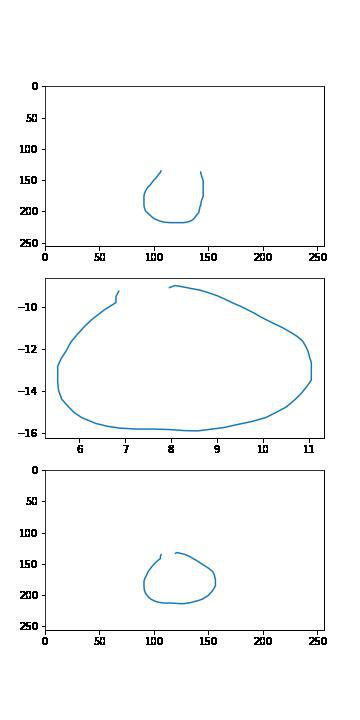

In [16]:
PIL.Image.open('/raid/xiaoyuz1/sketch_datasets/spg_body/jpg/20000angel_output_719_708.jpg')

In [35]:
def encode_one(idx_test):
    train_category, train_idx = train_info[idx_test]
    print(train_category, train_idx)

    part_start_end = dataset_mapping[train_category]
    rendered_idxs, _ = part_start_end
    
    new_idx = np.cumsum(sr.kept_idx,0) -1
    #print(new_idx[idx_test-1], new_idx[idx_test])
    idx_test_in_data = new_idx[idx_test]
    #print(idx_test_in_data)
    
    batch, lengths = sr.make_batch(1, random=False, selected_idx=[idx_test_in_data])
    z, _, _ = model.encoder(batch, 1)
    return z.detach().cpu().numpy()

In [38]:
features = []
all_image_paths = []
for idx in L:
    train_category, train_idx = train_info[idx]
    z = encode_one(idx)
    features += [z]
    
    all_image_paths.append(os.path.join(
        '/raid/xiaoyuz1/sketch_datasets/spg/angel', '{}.png'.format(train_idx)))

angel 0
angel 1
angel 2
angel 3
angel 5
angel 7
angel 8
angel 9
angel 10
angel 11
angel 12
angel 13
angel 15
angel 16
angel 17
angel 18
angel 19
angel 20
angel 22
angel 23
angel 24
angel 25
angel 26
angel 28
angel 29
angel 30
angel 31
angel 32
angel 33
angel 35
angel 37
angel 38
angel 39
angel 41
angel 42
angel 44
angel 45
angel 46
angel 47
angel 48
angel 49
angel 50
angel 52
angel 53
angel 54
angel 55
angel 56
angel 57
angel 58
angel 59
angel 60
angel 61
angel 62
angel 63
angel 64
angel 65
angel 66
angel 67
angel 69
angel 70
angel 71
angel 72
angel 73
angel 74
angel 75
angel 76
angel 77
angel 79
angel 80
angel 82
angel 83
angel 84
angel 85
angel 86
angel 87
angel 88
angel 89
angel 90
angel 91
angel 93
angel 94
angel 95
angel 96
angel 97
angel 98
angel 99
angel 100
angel 101
angel 102
angel 103
angel 104
angel 105
angel 106
angel 107
angel 108
angel 109
angel 110
angel 111
angel 112
angel 113
angel 115
angel 116
angel 117
angel 118
angel 119
angel 120
angel 121
angel 122
angel 123
ange

In [39]:
feature_path = os.path.join(root_folder, 'angel_feature', '0.npy')
print("Write feature to: ", feature_path)
with open(feature_path, 'wb') as f:
    np.save(f, np.vstack(features))

image_name_path = os.path.join(root_folder, 'angel_feature', '0.txt')
print("Write image path to: ", image_name_path)
with open(image_name_path, "w+") as f:
    f.write("\n".join(all_image_paths))

Write feature to:  /raid/xiaoyuz1/sketch_datasets/spg_body/angel_feature/0.npy
Write image path to:  /raid/xiaoyuz1/sketch_datasets/spg_body/angel_feature/0.txt
